In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf 
from tensorflow.keras import layers
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import os
import pandas as pd

In [3]:
def loadImages(directory):
    all_images = []
    for img in os.listdir(directory):
        if img.endswith(".tif"):
          image = cv2.imread(directory + '/' + img)
          all_images.append(image)

    return all_images

In [4]:
samplePath = r"C:\Users\charlie\Documents\uni\year_3\IntroAI\histopathologic-cancer-detection\sample"
all_images = loadImages(samplePath)

In [5]:
all_images_stack = np.stack(all_images).astype('uint8')

In [6]:
print(len(all_images_stack))

340


In [7]:
dummy_attributes = np.random.choice([0, 1], size=(340,))
print(dummy_attributes)

[0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1
 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1
 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0
 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1
 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1
 1 1 0 1 1 0 1]


In [8]:
def loadImageNames(directory):
    all_images_names = []
    for img in os.listdir(directory):
        if img.endswith(".tif"):
            img = img.replace('.tif','')
            all_images_names.append(img)


    return all_images_names

In [9]:
all_images_names = loadImageNames(samplePath)
print(all_images_names)

['0000d563d5cfafc4e68acb7c9829258a298d9b6a', '0000da768d06b879e5754c43e2298ce48726f722', '0000f8a4da4c286eee5cf1b0d2ab82f979989f7b', '000a2a35668f04edebc0b06d5d133ad90c93a044', '000aa5d8f68dc1f45ebba53b8f159aae80e06072', '000aa638312a3dad22ef04b8a7df3fc98fc2e7c3', '000aa7c34dc319d936d36f7f4c257812d3d03cdf', '000af35befdd9ab2e24fac80fb6508dfd1edd172', '000b35e7c39c6cb32224dcb3fe4c48acf34f0252', '000b666f7b5f03e81937cb12b3a1c8c279b08292', '000c3d0468a1a0a7a35a2e453f4b891b3a4e7fb6', '000c4f225ec3f4d1eaa986d75596cc71e10568b6', '000d337132cccccef8b9bbe1f0e5123d13fcb74c', '000d3de1f31201b54cf82572c10099606f33c791', '000d4bcc9d239e8304890ffd764794e93504e475', '000deffa1f84b351dfa7fafa33fee39a49e09a79', '000df899c72f373102b7775e76bb31533a0588a3', '000e38e52108b7ed40304d46c81fdafaa1a0efe6', '000eafa5c4bb43c9fd886d07783419999ba103dc', '000ef1b51b71267e85aca599d4def578d870c9e0', '000f499acc525aba7381358d4643588e52e7bf93', '000fa0f36a1b472cffc63590a101fbebd0b74b68', '000faf43b1366cbd0902a3b9607281

In [10]:
import csv
import sys
labels = []

def id_finder(image_name):
    labels_path = r'C:\Users\charlie\Documents\uni\year_3\IntroAI\histopathologic-cancer-detection\train_labels.csv'
    #read csv, and split on "," the line
    csv_file = csv.reader(open(labels_path, "r"))


    #loop through the csv list
    for row in csv_file:
        #if current rows 2nd value is equal to input, print that row
        if image_name == row[0]:
            idx = row
    return idx

In [11]:
for i in all_images_names:
    idx = id_finder(i)
    labels.append(idx)


In [12]:
print(len(labels))
ids_labels = labels

340


In [13]:
labels = []
for i in ids_labels: 
    labels.append(i[1])

In [14]:
print(labels)

['0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0',

0.5 -0.5


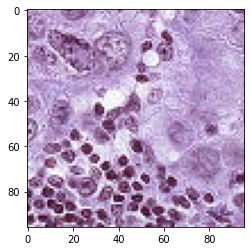

In [15]:
X = all_images_stack.astype('float32') / 255.0 - 0.5
print(X.max(), X.min())

def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))

show_image(X[6])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,labels, test_size=0.1, random_state=42)

In [17]:
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model

def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size,activation='relu'))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape),activation='sigmoid'))
    decoder.add(Reshape(img_shape))

    return encoder, decoder

In [18]:

# Same as (32,32,3), we neglect the number of instances from shape
IMG_SHAPE = X.shape[1:]
encoder, decoder = build_autoencoder(IMG_SHAPE, 100)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')

print(autoencoder.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 100)               2764900   
                                                                 
 sequential_1 (Sequential)   (None, 96, 96, 3)         2792448   
                                                                 
Total params: 5,557,348
Trainable params: 5,557,348
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
def findCodes(X):
    codes = []
    for i in X:
        code = encoder.predict(i[None])[0]
        codes.append(code)
    return codes
    
codes_train = findCodes(X_train)
codes_test = findCodes(X_test)

In [20]:
history = autoencoder.fit(x=X_train, y=X_train, epochs=25, validation_data=[X_test, X_test])

Epoch 1/25
10/10 [==============================] - 2s 114ms/step - loss: 0.1182 - val_loss: 0.0446
Epoch 2/25
10/10 [==============================] - 1s 62ms/step - loss: 0.0470 - val_loss: 0.0441
Epoch 3/25
10/10 [==============================] - 1s 67ms/step - loss: 0.0458 - val_loss: 0.0437
Epoch 4/25
10/10 [==============================] - 1s 62ms/step - loss: 0.0451 - val_loss: 0.0429
Epoch 5/25
10/10 [==============================] - 1s 65ms/step - loss: 0.0445 - val_loss: 0.0424
Epoch 6/25
10/10 [==============================] - 1s 63ms/step - loss: 0.0441 - val_loss: 0.0420
Epoch 7/25
10/10 [==============================] - 1s 63ms/step - loss: 0.0437 - val_loss: 0.0415
Epoch 8/25
10/10 [==============================] - 1s 64ms/step - loss: 0.0434 - val_loss: 0.0412
Epoch 9/25
10/10 [==============================] - 1s 62ms/step - loss: 0.0431 - val_loss: 0.0409
Epoch 10/25
10/10 [==============================] - 1s 61ms/step - loss: 0.0428 - val_loss: 0.0406
Epoch 11

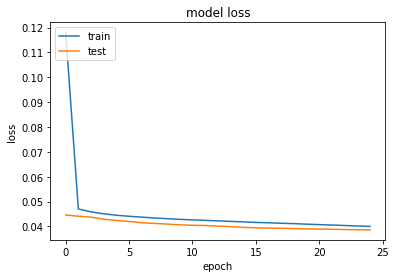

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

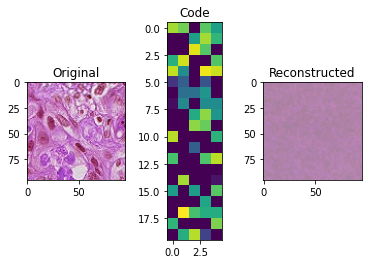

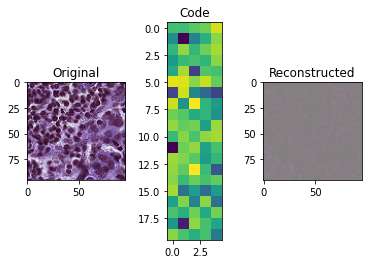

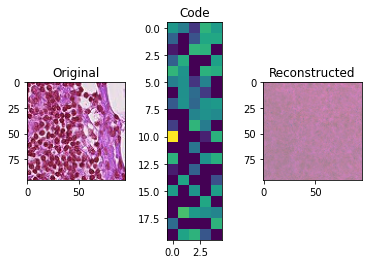

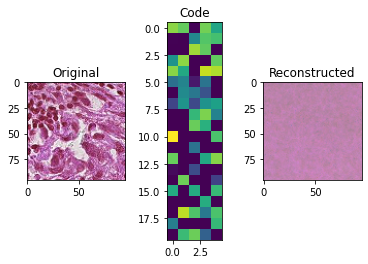

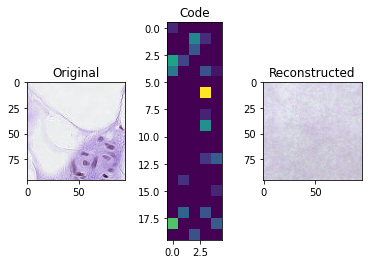

In [22]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//5,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()

for i in range(5):
    img = X_test[i]
    visualize(img,encoder,decoder)

In [23]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Accuracy of LDA classifier on training set: 0.84
Accuracy of LDA classifier on test set: 0.50
Accuracy of QDA classifier on training set: 1.00
Accuracy of QDA classifier on test set: 0.53
[[10  8]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.53      0.56      0.54        18
           1       0.47      0.44      0.45        16

    accuracy                           0.50        34
   macro avg       0.50      0.50      0.50        34
weighted avg       0.50      0.50      0.50        34

[[18  0]
 [16  0]]
              precision    recall  f1-score   support

           0       0.53      1.00      0.69        18
           1       0.00      0.00      0.00        16

    accuracy                           0.53        34
   macro avg       0.26      0.50      0.35        34
weighted avg       0.28      0.53      0.37        34



c:\Users\charlie\Documents\uni\year_3\IntroAI\ai-group-project-group-22\.venv2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\charlie\Documents\uni\year_3\IntroAI\ai-group-project-group-22\.venv2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\charlie\Documents\uni\year_3\IntroAI\ai-group-project-group-22\.venv2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use 

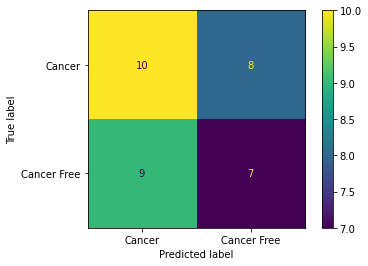

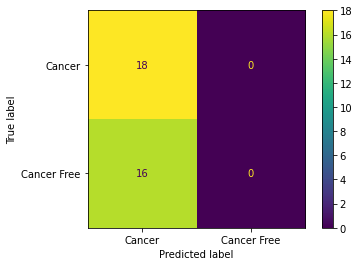

In [24]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(codes_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(codes_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(codes_test, y_test)))

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(codes_train, y_train)
print('Accuracy of QDA classifier on training set: {:.2f}'
     .format(qda.score(codes_train, y_train)))
print('Accuracy of QDA classifier on test set: {:.2f}'
     .format(qda.score(codes_test, y_test)))

y_pred_lda = lda.predict(codes_test)
y_pred_qda = qda.predict(codes_test)

print(confusion_matrix(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))
print(confusion_matrix(y_test, y_pred_qda))
print(classification_report(y_test, y_pred_qda))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lda, display_labels=['Cancer', 'Cancer Free'])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_qda, display_labels=['Cancer', 'Cancer Free'])

Accuracy of Decision Tree classifier on training set: 0.69
Accuracy of Decision Tree classifier on test set: 0.68
[[ 9  9]
 [ 2 14]]
              precision    recall  f1-score   support

           0       0.82      0.50      0.62        18
           1       0.61      0.88      0.72        16

    accuracy                           0.68        34
   macro avg       0.71      0.69      0.67        34
weighted avg       0.72      0.68      0.67        34



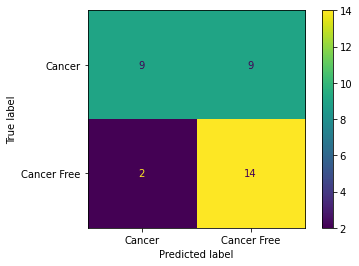

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
decTree = DecisionTreeClassifier(max_depth=3).fit(codes_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(decTree.score(codes_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(decTree.score(codes_test, y_test)))

y_pred_tree = decTree.predict(codes_test)


print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, display_labels=['Cancer', 'Cancer Free'])

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

parameters = {"n_neighbors": range(1, 50), "weights": ["uniform", "distance"]}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(codes_train, y_train)
gridsearch.best_params_

NameError: name 'KNeighborsClassifier' is not defined

Accuracy of K-NN classifier on training set: 0.63
Accuracy of K-NN classifier on test set: 0.65
[[10  8]
 [ 4 12]]
              precision    recall  f1-score   support

           0       0.71      0.56      0.63        18
           1       0.60      0.75      0.67        16

    accuracy                           0.65        34
   macro avg       0.66      0.65      0.65        34
weighted avg       0.66      0.65      0.64        34



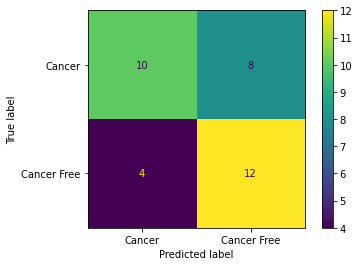

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(codes_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(codes_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(codes_test, y_test)))
y_pred = knn.predict(codes_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Cancer', 'Cancer Free'])

Accuracy of SVM classifier on training set: 0.85
Accuracy of SVM classifier on test set: 0.76
[[14  4]
 [ 4 12]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        18
           1       0.75      0.75      0.75        16

    accuracy                           0.76        34
   macro avg       0.76      0.76      0.76        34
weighted avg       0.76      0.76      0.76        34



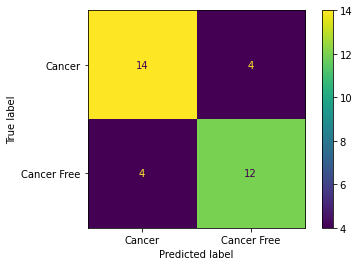

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(codes_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(codes_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(codes_test, y_test)))
y_pred = svm.predict(codes_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Cancer','Cancer Free'])